In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Se ajustan los valores *record_date* y *player_name*

In [2]:
record_date = '20230908'

In [3]:
player_name = 'arrojeria_esther'

In [4]:
PLAYER_HR_FILE_DIR = f'../../../../datasets/study-players/{record_date}/{player_name}_hr.csv'

In [5]:
hr = pd.read_csv(PLAYER_HR_FILE_DIR,index_col=0)
hr.head()

,seconds,date,hr
8771,"80,802",[2023-09-08 19:19:20 454],74.0
8829,"81,302",[2023-09-08 19:19:20 954],74.0
8885,"81,802",[2023-09-08 19:19:21 454],74.0
8938,"82,302",[2023-09-08 19:19:21 954],75.0
8993,"82,802",[2023-09-08 19:19:22 454],75.0


In [6]:
hr.dtypes

seconds     object
date        object
hr         float64
dtype: object

Se convierte el valor de seconds a un valor númerico

In [7]:
def convert_comma_to_point(value):
    if isinstance(value, str):
        return value.replace(',','.')
    return value

In [8]:
hr['seconds'] = hr['seconds'].apply(lambda x: convert_comma_to_point(x))
hr['seconds'] = hr['seconds'].apply(pd.to_numeric)

Se hace un pequeño estudio

<AxesSubplot:>

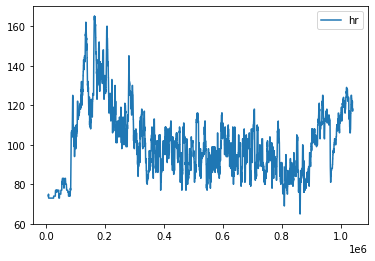

In [9]:
hr.plot(y='hr')

In [10]:
min_seconds = hr['seconds'].min()
max_seconds = hr['seconds'].max()

print(f"Valor mínimo {min_seconds}")
print(f"Valor máximo {max_seconds}")

Valor mínimo 80.802
Valor máximo 9219.816


In [11]:
minutes = (max_seconds - min_seconds) / 60
hours = minutes / 60
print(f"Minutos totales: {minutes} minutos")
print(f"Horas totales: {hours} horas")

Minutos totales: 152.3169 minutos
Horas totales: 2.538615 horas


La frecuencia de la variable HR es de 0.5 segundos, es decir, cada medio segundo, se recoge el ritmo cardíaco de la jugada. Se va a comprobar que esto se cumple.

In [12]:
hr['seconds'].diff()

8771         NaN
8829       0.500
8885       0.500
8938       0.500
8993       0.500
           ...  
1040981    0.501
1041038    0.499
1041094    0.503
1041150    0.500
1041207    0.500
Name: seconds, Length: 17520, dtype: float64

In [13]:
hr['seconds'].diff().unique()

array([   nan,  0.5  ,  1.5  ,  6.5  , 30.5  ,  2.5  ,  3.5  ,  9.5  ,
       42.5  ,  6.5  ,  8.5  , 12.5  , 10.5  , 17.5  ,  4.5  ,  5.5  ,
        7.5  , 29.5  ,  3.   ,  2.   ,  0.5  ,  4.   ,  5.   ,  0.5  ,
        0.515,  0.499,  0.501,  0.484,  0.503,  0.498,  0.502,  0.502,
        0.497,  0.499,  0.505,  0.483,  0.517,  0.498,  0.518,  0.481,
        0.482,  0.519,  0.481,  0.501,  0.504,  0.464,  0.53 ,  0.484,
        0.516,  3.502,  1.999,  0.497,  0.517,  2.499,  0.467,  0.535,
        0.52 ,  0.496,  0.469,  0.48 ,  0.521,  0.519,  0.482,  0.451,
        0.548,  0.472,  0.532,  0.479,  0.479,  0.504,  0.518,  0.503,
        0.478,  0.521,  0.508,  0.493,  0.45 ,  0.552,  0.485,  0.522,
        0.483,  0.495,  0.506,  0.475,  0.528,  0.494,  0.536,  0.476,
        0.507,  0.496,  0.494,  0.469,  0.52 ,  0.462,  0.54 ,  0.505,
        0.495,  3.999,  2.499,  0.508,  0.5  ,  0.516,  0.534,  0.498,
        0.52 ,  0.502,  0.501,  0.479,  0.499,  0.508,  0.477,  0.49 ,
      

In [14]:
hr['diff'] = hr['seconds'].diff()

In [15]:
hr.pivot_table(columns=['diff'], aggfunc='size')

diff
0.395     1
0.411     1
0.416     1
0.446     1
0.447     1
         ..
12.500    1
17.500    1
29.500    1
30.500    1
42.500    1
Length: 239, dtype: int64

Se interpolan los datos

In [16]:
new_df = pd.DataFrame()

In [17]:
last = hr.iloc[0]
for i in range(1, hr.shape[0]):
    new_df = new_df.append(last)
    # si valor actual tiene diff mayor que 0.5, generar números
    
    if hr.iloc[i]['diff'] > 0.5:
        seconds = last['seconds']
        value = (hr.iloc[i]['hr'] + last['hr'])/ 2
        #print(hr.iloc[i]['hr'], last['hr'], value)
        #print(last, hr.iloc[i])
        for x in range(0, int(hr.iloc[i]['diff']/0.5) -1):
            
            seconds = seconds + 0.5
            new_df = new_df.append({'seconds': seconds, 'date': None, 'hr': value},ignore_index=True)
    last = hr.iloc[i]


In [18]:
new_df

,seconds,date,hr,diff
0,80.802,[2023-09-08 19:19:20 454],74.0,NaN
1,81.302,[2023-09-08 19:19:20 954],74.0,0.500
2,81.802,[2023-09-08 19:19:21 454],74.0,0.500
3,82.302,[2023-09-08 19:19:21 954],75.0,0.500
4,82.802,[2023-09-08 19:19:22 454],75.0,0.500
...,...,...,...,...
1040923,9217.313,[2023-09-08 21:51:36 965],118.0,0.499
1040981,9217.814,[2023-09-08 21:51:37 466],118.0,0.501
1041038,9218.313,[2023-09-08 21:51:37 965],118.0,0.499
1041094,9218.816,[2023-09-08 21:51:38 468],118.0,0.503


In [19]:
new_df.to_csv(f'../../../../datasets/study-players/{record_date}/{player_name}_hr_without_gaps.csv')

# Ahora hacer lo mismo con activity

In [20]:
PLAYER_ACTIVITY_FILE_DIR = f'../../../../datasets/study-players/{record_date}/{player_name}_activity_load.csv'

In [21]:
activity_load = pd.read_csv(PLAYER_ACTIVITY_FILE_DIR,index_col=0)
activity_load.head()

,seconds,date,activity_load_2d,activity_load_3d
79,"1,790",[2023-09-08 19:18:01 442],"0,0088","0,0097"
185,"2,790",[2023-09-08 19:18:02 442],"0,0018","0,0025"
295,"3,790",[2023-09-08 19:18:03 442],"0,0018","0,0029"
406,"4,790",[2023-09-08 19:18:04 442],"0,0042","0,0051"
517,"5,790",[2023-09-08 19:18:05 442],"0,0031","0,0041"


Se debe cambiar los valores numéricos a las cargas de actividad y a los segundos

In [22]:
activity_load['seconds'] = activity_load['seconds'].apply(lambda x: convert_comma_to_point(x))
activity_load['seconds'] = activity_load['seconds'].apply(pd.to_numeric)

In [23]:
activity_load['activity_load_2d'] = activity_load['activity_load_2d'].apply(lambda x: convert_comma_to_point(x))
activity_load['activity_load_2d'] = activity_load['activity_load_2d'].apply(pd.to_numeric)

In [24]:
activity_load['activity_load_3d'] = activity_load['activity_load_3d'].apply(lambda x: convert_comma_to_point(x))
activity_load['activity_load_3d'] = activity_load['activity_load_3d'].apply(pd.to_numeric)

In [25]:
activity_load.dtypes

seconds             float64
date                 object
activity_load_2d    float64
activity_load_3d    float64
dtype: object

Se muestran unos gráficos

<AxesSubplot:>

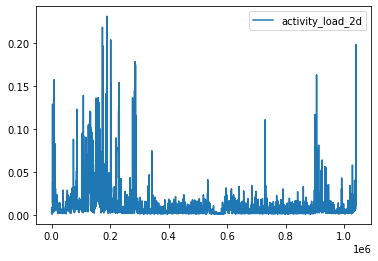

In [26]:
activity_load.plot(y='activity_load_2d')

<AxesSubplot:>

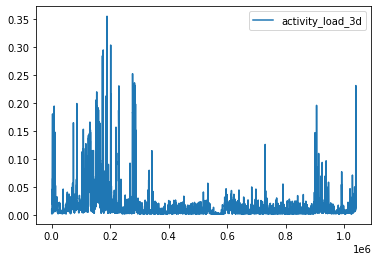

In [27]:
activity_load.plot(y='activity_load_3d')

In [28]:
min_seconds = activity_load['seconds'].min()
max_seconds = activity_load['seconds'].max()

print(f"Valor mínimo {min_seconds}")
print(f"Valor máximo {max_seconds}")

Valor mínimo 1.79
Valor máximo 9220.51


In [29]:
minutes = (max_seconds - min_seconds) / 60
hours = minutes / 60
print(f"Minutos totales: {minutes} minutos")
print(f"Horas totales: {hours} horas")

Minutos totales: 153.64533333333333 minutos
Horas totales: 2.5607555555555552 horas


Se cuenta con más info de la carga de actividad

Se comprueban los gaps, frecuencia de un segundoactivity_load['seconds'].diff()

In [30]:
activity_load['seconds'].diff()

79           NaN
185        1.000
295        1.000
406        1.000
517        1.000
           ...  
1040832    0.984
1040947    1.017
1041060    1.000
1041172    1.002
1041280    1.000
Name: seconds, Length: 9195, dtype: float64

In [31]:
activity_load['seconds'].diff().unique()

array([  nan, 1.   , 1.   , 1.158, 1.   , 1.162, 1.   , 1.161, 1.163,
       1.   , 1.161, 1.16 , 1.162, 1.183, 1.14 , 1.161, 1.161, 1.   ,
       1.162, 1.161, 1.162, 1.16 , 1.   , 1.162, 1.161, 1.015, 0.999,
       1.001, 1.16 , 0.985, 1.014, 1.002, 0.998, 1.001, 0.999, 0.997,
       1.004, 0.984, 1.016, 1.003, 0.997, 1.017, 0.982, 1.017, 0.983,
       1.018, 1.003, 1.167, 0.965, 1.03 , 0.981, 1.002, 0.983, 0.98 ,
       1.019, 1.006, 1.16 , 0.998, 0.984, 1.019, 0.967, 1.035, 0.996,
       1.02 , 1.129, 1.032, 0.981, 1.144, 0.953, 1.047, 0.985, 0.973,
       1.177, 0.979, 1.021, 1.165, 1.004, 0.979, 1.021, 1.008, 0.992,
       0.949, 1.052, 0.978, 1.023, 1.005, 1.158, 1.022, 1.006, 0.994,
       0.965, 1.036, 0.976, 0.995, 1.023, 1.155, 0.982, 1.018, 1.015,
       0.961, 1.039, 0.994, 1.022, 1.156, 1.016, 1.163, 0.998, 1.002,
       0.98 , 1.001, 0.999, 0.991, 1.03 , 0.997, 1.016, 0.97 , 1.158,
       1.003, 0.966, 0.977, 1.021, 1.019, 1.017, 0.971, 1.02 , 0.978,
       1.022, 0.981,

No hay gaps significativos, no hay que hacer cambios, se guarda el dataset.

In [32]:
activity_load.to_csv(f'../../../../datasets/study-players/{record_date}/{player_name}_activity_load.csv')